In [114]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [116]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
#    -O /tmp/irish-lyrics-eof.txt

#from google.colab import files
#uploaded = files.upload()

!wget --no-check-certificate \
    https://drive.google.com/file/d/1RdDfuWmiT7OdVmmHhbmO6EavhnRB-4WF/view?usp=sharing \
    -O /tmp/essaynew.txt

# Mordern Essay - John Macy
#!wget --show-progress --continue -O /content/modernessay.txt https://www.gutenberg.org/files/38280/38280-0.txt

--2020-10-03 04:26:12--  https://drive.google.com/file/d/1RdDfuWmiT7OdVmmHhbmO6EavhnRB-4WF/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.195.100, 74.125.195.102, 74.125.195.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/essaynew.txt’

/tmp/essaynew.txt       [ <=>                ]  61.84K  --.-KB/s    in 0.009s  

2020-10-03 04:26:12 (6.75 MB/s) - ‘/tmp/essaynew.txt’ saved [63324]



In [117]:
tokenizer = Tokenizer()

#data = open('/tmp/irish-lyrics-eof.txt').read()
#data = open('/tmp/paradiselost.txt').read()
#data = open('/content/modernessay.txt').read()
data = open('/content/essay10.txt').read()
#print(data)
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'i': 2, 'to': 3, 'and': 4, 'of': 5, 'a': 6, 'my': 7, 'in': 8, 'that': 9, 'is': 10, 'it': 11, 'beauty': 12, 'with': 13, 'was': 14, 'as': 15, 'for': 16, 'me': 17, 'be': 18, 'have': 19, 'on': 20, 'but': 21, 'person': 22, 'you': 23, 'are': 24, 'at': 25, 'how': 26, 'from': 27, 'an': 28, 'one': 29, 'more': 30, 'not': 31, 'this': 32, 'when': 33, 'or': 34, 'they': 35, 'life': 36, 'people': 37, 'their': 38, 'what': 39, 'all': 40, 'we': 41, 'by': 42, 'about': 43, 'time': 44, 'will': 45, 'who': 46, 'can': 47, 'basically': 48, 'them': 49, 'has': 50, 'world': 51, 'had': 52, 'something': 53, 'outer': 54, 'into': 55, 'like': 56, 'way': 57, 'being': 58, 'just': 59, 'very': 60, 'out': 61, 'if': 62, 'first': 63, 'up': 64, 'however': 65, 'were': 66, 'there': 67, 'still': 68, 'make': 69, 'then': 70, 'other': 71, 'because': 72, 'been': 73, 'her': 74, 'things': 75, 'so': 76, 'don’t': 77, 'only': 78, 'beautiful': 79, 'through': 80, 'want': 81, 'inner': 82, 'find': 83, 'new': 84, 'even': 85, 'it’s'

In [118]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [119]:
print(tokenizer.word_index['in'])


8


In [120]:
#print(xs[6])

In [121]:
#print(ys[6])

In [122]:
#print(xs[5])
#print(ys[5])

In [123]:
print(tokenizer.word_index)

{'the': 1, 'i': 2, 'to': 3, 'and': 4, 'of': 5, 'a': 6, 'my': 7, 'in': 8, 'that': 9, 'is': 10, 'it': 11, 'beauty': 12, 'with': 13, 'was': 14, 'as': 15, 'for': 16, 'me': 17, 'be': 18, 'have': 19, 'on': 20, 'but': 21, 'person': 22, 'you': 23, 'are': 24, 'at': 25, 'how': 26, 'from': 27, 'an': 28, 'one': 29, 'more': 30, 'not': 31, 'this': 32, 'when': 33, 'or': 34, 'they': 35, 'life': 36, 'people': 37, 'their': 38, 'what': 39, 'all': 40, 'we': 41, 'by': 42, 'about': 43, 'time': 44, 'will': 45, 'who': 46, 'can': 47, 'basically': 48, 'them': 49, 'has': 50, 'world': 51, 'had': 52, 'something': 53, 'outer': 54, 'into': 55, 'like': 56, 'way': 57, 'being': 58, 'just': 59, 'very': 60, 'out': 61, 'if': 62, 'first': 63, 'up': 64, 'however': 65, 'were': 66, 'there': 67, 'still': 68, 'make': 69, 'then': 70, 'other': 71, 'because': 72, 'been': 73, 'her': 74, 'things': 75, 'so': 76, 'don’t': 77, 'only': 78, 'beautiful': 79, 'through': 80, 'want': 81, 'inner': 82, 'find': 83, 'new': 84, 'even': 85, 'it’s'

In [124]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=30, verbose=1)
#print model.summary()
print(model)


Epoch 1/30
340/340 [==============================] - 14s 40ms/step - loss: 6.7308 - accuracy: 0.0560
Epoch 2/30
340/340 [==============================] - 13s 40ms/step - loss: 5.8751 - accuracy: 0.1026
Epoch 3/30
340/340 [==============================] - 13s 39ms/step - loss: 5.0681 - accuracy: 0.1465
Epoch 4/30
340/340 [==============================] - 13s 39ms/step - loss: 4.1497 - accuracy: 0.2141
Epoch 5/30
340/340 [==============================] - 13s 39ms/step - loss: 3.1913 - accuracy: 0.3161
Epoch 6/30
340/340 [==============================] - 13s 39ms/step - loss: 2.4235 - accuracy: 0.4379
Epoch 7/30
340/340 [==============================] - 13s 39ms/step - loss: 1.8235 - accuracy: 0.5507
Epoch 8/30
340/340 [==============================] - 13s 39ms/step - loss: 1.3851 - accuracy: 0.6485
Epoch 9/30
340/340 [==============================] - 13s 39ms/step - loss: 1.0626 - accuracy: 0.7212
Epoch 10/30
340/340 [==============================] - 13s 40ms/step - loss: 0.903

In [125]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

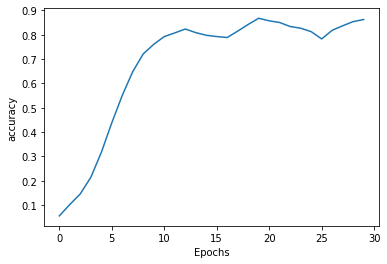

In [126]:
plot_graphs(history, 'accuracy')


In [129]:
#seed_text = "Beautiful blue sky"
#seed_text = "Life is a challange"
#seed_text = "Curiosity is awesome"
seed_text = "I like computer science"

next_words = 60
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print("---------------------")	
print(seed_text)

---------------------
I like computer science that feeling that defines was wrapped in science foundation contest where you in the answer began quite unintentionally when i had grown to love as a student ambassador even though my last name gives them a hint the asian students at our school don’t believe that we were two equally discombobulated partners some but i remained eager to understand the
